# Isentropic quasi-1D steady compressible flow
This notebook demonstrates the use of the compressible flow tools for computing
states and processes in isentropic quasi-1d steady compressible flow.

### Set up the module

In [1]:
using Gasdynamics1D

In [2]:
using Plots
using LaTeXStrings

### Using isentropic relations
Let us apply some basic isentropic relations.

#### Example 1
Let's suppose two states of the flow in air, 1 and 2, are connected with each
other by an isentropic process. We know the pressure p1 is 101 kPa, the temperature
T1 is 20 degrees C, and the pressure p2 is 80 kPa. What is temperature T2?

To answer this, we will use the relationship

$$ \dfrac{T_2}{T_1} = \left( \dfrac{p_2}{p_1}\right)^{(\gamma-1)/\gamma} $$

In [3]:
p1 = Pressure(101,units=KPa)
T1 = Temperature(20,units=C)
p2 = Pressure(80,units=KPa)

Pressure = 80000.0 Pascals

First, let's set the pressure ratio:

In [4]:
p2_over_p1 = PressureRatio(p2/p1)

PressureRatio = 0.792079 

Now find the temperature ratio. Note below that we specify the argument
`Isentropic` to make sure it is clear that we are using the isentropic relation.
We only need this argument when it is needed for clarity.

In [5]:
T2_over_T1 = TemperatureRatio(p2_over_p1,Isentropic)

TemperatureRatio = 0.935571 

It is important to understand that the tools "know" what formula you want to use
(the one listed above), based on the fact that (a) you supplied it with a pressure
ratio (the purpose of the `PressureRatio` line above), and (b) you told it that
the process is `Isentropic`. It figures out the rest.
Finally, calculate $T_2 = T_1 (T_2/T_1)$:

In [6]:
T2 = Temperature(T1*T2_over_T1)

Temperature = 274.263 Kelvin

or, in Celsius, if desired

In [7]:
value(T2,Celsius)

1.1126355938594088

We could also do all of this in one line, though it is a bit harder to debug
if something goes wrong:

In [8]:
T2 = Temperature(T1*TemperatureRatio(PressureRatio(p2/p1),Isentropic))

Temperature = 274.263 Kelvin

#### Example 2
If the temperature ratio $T/T_0$ is 0.2381, what is the Mach number?

In [9]:
MachNumber(TemperatureRatio(0.2381),Isentropic)

MachNumber = 3.99995 

#### Example 3
If the Mach number is 4.4 and stagnation pressure is 800 KPa, what is the pressure?

In [10]:
Pressure(StagnationPressure(800,units=KPa),MachNumber(4.4),Isentropic)

Pressure = 3134.11 Pascals

### Mach - area relations
A big part of isentropic quasi-1D flow deals with changes of the flow in variable-area
ducts. For these calculations, we make use of the *sonic area* $A_*$ as a reference area.
Remember that, for any ratio of $A/A_*$, there are two possible Mach numbers,
corresponding to a **subsonic flow** and a **supersonic flow**. Let us see that by
plotting $A/A_*$ versus Mach number $M$. If, for example, $A/A_* = 2$, then
note where the dashed line crosses the plot:

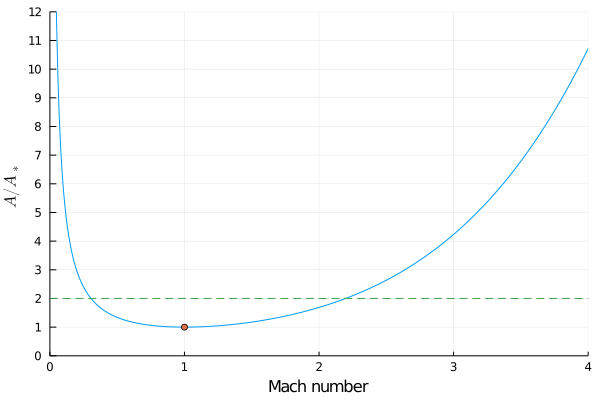

In [11]:
Mrange = range(0,6,length=601)
Aratio = []
for M in Mrange
    push!(Aratio,value(AOverAStar(MachNumber(M),Isentropic)))
end

plot(Mrange,Aratio,xlim=(0,4),ylim=(0,12),yticks=0:1:12,xlabel="Mach number",ylabel=L"A/A_*",legend=false)
scatter!([1],[1])
plot!(Mrange,2*ones(length(Mrange)),style=:dash)

#### Example 4
What are the subsonic and supersonic Mach numbers associated with, for example,
an area ratio $A/A_*$ of 2 (the dashed line in the plot above)? We simply input
the desired area ratio and find the two solutions:

In [12]:
M1, M2 = MachNumber(AreaRatio(2),Isentropic);

In [13]:
M1

MachNumber = 0.305904 

In [14]:
M2

MachNumber = 2.1972 

A related question: What is the local sonic reference area $A_*$ when the Mach
number is 7.1 and the local area is 50 sq cm?

We first compute $A/A_*$ from $M = 7.1$, then compute $A_* = A/(A/A_*)$:

In [15]:
A = Area(50,units=SqCM)
M = MachNumber(7.1)
A_over_Astar = AOverAStar(M,Isentropic)
Astar = Area(A/A_over_Astar)
value(Astar,SqCM)

0.4507312336039658

So the throat would have to be 0.45 sq cm, much smaller than 50 sq cm!
Note that there is a convenience function to do those steps all in one:

In [16]:
value(AStar(A,M),SqCM)

0.4507312336039658

#### Example 5
Consider the flow of air through a converging-diverging nozzle, leaving a stagnant
reservoir at pressure $p_0$ = 700 kPa and temperature $T_0 = 30$ degrees C. The Mach
number at a location (1) in the converging section with area 50 sq cm is equal to 0.4.
The exit of the nozzle has area 60 sq cm.

(a) What are the possible Mach numbers at the exit in choked isentropic conditions?
What are the exit (i.e., "back") pressures $p_2$ associated with these two Mach numbers?

(b) What is the mass flow rate through the nozzle in these conditions?

First, we set the known values

In [17]:
p0 = StagnationPressure(700,units=KPa)
T0 = StagnationTemperature(30,units=C)
A1 = Area(50,units=SqCM)
A2 = Area(60,units=SqCM)
M1 = MachNumber(0.4)

MachNumber = 0.4 

Now, we compute $A_1/A_*$ from $M_1$. Use this to calculate $A_*$ from $A_1/(A_1/A_*)$.
Then calculate $A_2/A_*$:

In [18]:
A1_over_Astar = AOverAStar(M1,Isentropic,gas=Air)
Astar = Area(A1/A1_over_Astar)
A2_over_Astar = AreaRatio(A2/Astar)

AreaRatio = 1.90817 

Now calculate the Mach numbers at location 2 (the nozzle exit):

In [19]:
M2sub, M2sup = MachNumber(A2_over_Astar,Isentropic,gas=Air);

In [20]:
M2sub

MachNumber = 0.322613 

In [21]:
M2sup

MachNumber = 2.1438 

Actually, all of the last few steps can be done in *one step* with a different
version of the function `MachNumber`:

In [22]:
M2sub, M2sup = MachNumber(M1,A1,A2,Isentropic,gas=Air);

In [23]:
M2sub

MachNumber = 0.322613 

In [24]:
M2sup

MachNumber = 2.1438 

Now let's determine the exit pressures (location 2) corresponding to these two Mach numbers:

In [25]:
p0_over_p2sub = P0OverP(M2sub,Isentropic,gas=Air)
p2sub = Pressure(p0/p0_over_p2sub)
value(p2sub,KPa)

651.301619254323

In [26]:
p0_over_p2sup = P0OverP(M2sup,Isentropic,gas=Air)
p2sup = Pressure(p0/p0_over_p2sup)
value(p2sup,KPa)

71.48184181875564

So if the exit pressure is 651 kPa, then the flow will remain choked and **subsonic**
throughout, and if the exit pressure is 71.5 kPa, then the flow will remain choked
and **supersonic** throughout.

Note that, because the flow is choked, the mass flow rate is the same for both of
these cases. Let's calculate that mass flow rate (using $\rho_1 u_1 A_1$). We need
$\rho_1$ and $u_1$. First, calculate the stagnation density in this nozzle:

In [27]:
ρ0 = StagnationDensity(p0,T0,gas=Air) # this uses the perfect gas law

StagnationDensity = 8.0456 KGPerCuM

Using $M_1$, find $\rho_0/\rho_1$:

In [28]:
ρ0_over_ρ1 = ρ0Overρ(M1,Isentropic,gas=Air)

DensityRatio = 1.08193 

So we can get $\rho_1$ from $\rho_0/(\rho_0/\rho_1)$:

In [29]:
ρ1 = Density(ρ0/ρ0_over_ρ1)

Density = 7.43634 KGPerCuM

Now get $u_1$ from $M_1 c_1$, where $c_1$ is the speed of sound. For that, we need $T_1$:

In [30]:
T0_over_T1 = T0OverT(M1,Isentropic,gas=Air)
T1 = Temperature(T0/T0_over_T1)
c1 = SoundSpeed(T1)

SoundSpeed = 343.553 MPerSec

In [31]:
u1 = Velocity(M1*c1)

Velocity = 137.421 MPerSec

And now we can put it all together:

In [32]:
mdot = MassFlowRate(ρ1*u1*A1)

MassFlowRate = 5.10956 KGPerSec

So the mass flow rate is stuck at 5.1 kg/s

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*